In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [81]:
# Leer datos de paro descargados de eurostat
paro = pd.read_csv("ei_lmhr_m_1_Data.csv",delimiter = ',') 

# Eliminar registros no deseados
paro = paro[paro['UNIT'] == 'Percentage of active population']
paro = paro[paro['S_ADJ'] == 'Unadjusted data (i.e. neither seasonally adjusted nor calendar adjusted data)']
paro = paro[paro['INDIC'] == 'Unemployment according to ILO definition - Total']

In [82]:
# Nos quedamos con los 5 países con PI>B superior a 1e6 MM€ en 2019
geos = ['Germany (until 1990 former territory of the FRG)', 
       'Spain', 'France',  'Italy','United Kingdom']
paro = paro[paro['GEO'].isin(geos)]

# Hacemos limpieza de campos y creamos una columna por país
paro = paro[['TIME','GEO','Value']]
paro = paro[paro['Value'] != ':']
paro['Value'] = paro['Value'].astype(float)
paro =paro.pivot(index='TIME',columns = 'GEO')

In [84]:
paro.columns = ['France','Germany','Italy','Spain','United Kingdom']

In [122]:
# Añadir impacto del Covid en 2020M4 y M5 (3,4 M de personas en ERTE de los 18,6 M de activos)
paro.loc['2020M05', 'SpainCovid' ] = 30.0
paro.loc['2020M04', 'SpainCovid' ] = 30.4
paro.loc['2020M03', 'SpainCovid' ] = 14.7

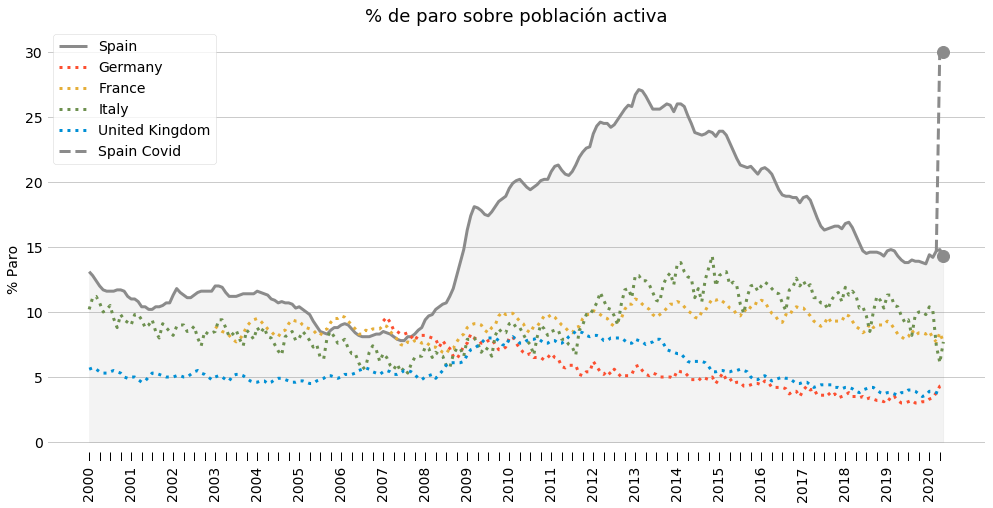

In [148]:
# Dibujar el gráfico de evolución del paro
x = paro.index
y1 = paro['Spain']
y2 = paro['Germany']
y3 = paro['France']
y4 = paro['Italy']
y5 = paro['United Kingdom']
y6 = paro['SpainCovid']

labels = []
# pretty labels
for n in x[::12]:
    labels.append(n[:4])
    for m in range(11):
        labels.append('')

plt.plot(x, y1,lw =3, ls='-', alpha=1, color=sns.color_palette()[4] , label= 'Spain')
plt.fill_between(x, 0, y1, alpha=0.1, color=sns.color_palette()[4])
plt.plot(x, y2, lw = 3, ls=':', alpha=1, color=sns.color_palette()[1], label= 'Germany')
plt.plot(x, y3, lw = 3, ls=':', alpha=1, color=sns.color_palette()[2], label= 'France')
plt.plot(x, y4, lw = 3, ls=':', alpha=1, color=sns.color_palette()[3], label= 'Italy')
plt.plot(x, y5, lw = 3, ls=':', alpha=1, color=sns.color_palette()[0], label= 'United Kingdom')
plt.plot(x, y6,lw =3, ls='--', alpha=1, color=sns.color_palette()[4] , label= 'Spain Covid')
plt.plot(x[-1:], y1[-1:] ,markersize = 12 ,marker = 'o',color=sns.color_palette()[4])
plt.plot(x[-1:], y6[-1:] ,markersize = 12 ,marker = 'o',color=sns.color_palette()[4])


plt.grid(axis='y') 
plt.xticks(x[::3], labels[::3], rotation=90)
plt.tick_params(axis = 'x',direction='in', length=10, width=1)
plt.legend(loc= 'best')
plt.ylabel('% Paro', rotation=90, ha = 'right')

plt.title('% de paro sobre población activa',fontsize= 18)
plt.savefig('images/unemployment.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [149]:
paro['Spain'].max()

27.1

In [150]:
paro['Spain'].min()

7.8